# Sequencial Image Classifier on Fashion MNIST

* This notebook's purpose is to fully understand the example given on *Hands-On Machine Learning* by *Aurélien Géron*.
* Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(64)
tf.random.set_seed(64)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

Load the Fashion MNIST dataset:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 images with a dimension of 28 x 28 and the test set contains 10,000:

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

We know that the images in this dataset are grayscale images, and the pixel intensities are represented as integers from 0 to 255.

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
np.amin(X_train_full)

0

In [9]:
np.amax(X_train_full)

255

We are going to create a validation set and as we are going to use Gradient Descent we must scale the input features. In this case we are going to scale the pixel intensities down to the 0-1 range.

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

The validation set contains 5,000 images, so now the training set contains 55,000:

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_train.shape

(55000, 28, 28)

Reading the documentation we know that there are 10 different possible outputs represented from 0 to 9, but we can check that with the cell below: 

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

If we keep reading the documentation we can see the class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's plot some examples of the training set:

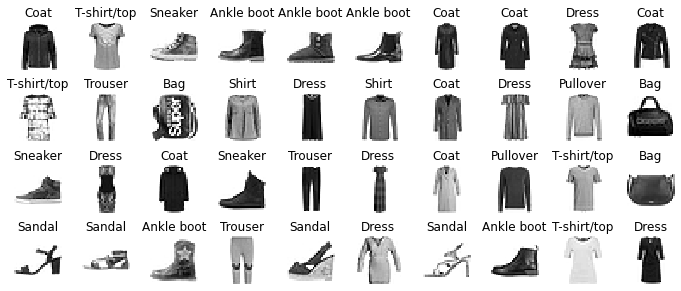

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now we are going to create a Sequential model:

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

* `Flatten` converts each input image in a 1D array. Since it is the first layer we have to specify the *input_shape*.
* `Dense output layer` with 10 neurons, one per class, using `softmax` activation function because the classes are exclusive.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Now we compile the model:

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* `sparse_categorical_crossentropy` because we have sparse labels and the classes are exclusive.

We train the model:

In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7024 - accuracy: 0.7693 - val_loss: 0.4937 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4873 - accuracy: 0.8309 - val_loss: 0.4464 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4419 - accuracy: 0.8455 - val_loss: 0.4089 - val_accuracy: 0.8632
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4148 - accuracy: 0.8536 - val_loss: 0.3961 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8599 - val_loss: 0.3728 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3781 - accuracy: 0.8662 - val_loss: 0.3634 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3644 - accuracy: 0.8709 - val_loss: 0.3532 - val_accuracy:

We can now plot the metrics to see the model behavior through the epochs.

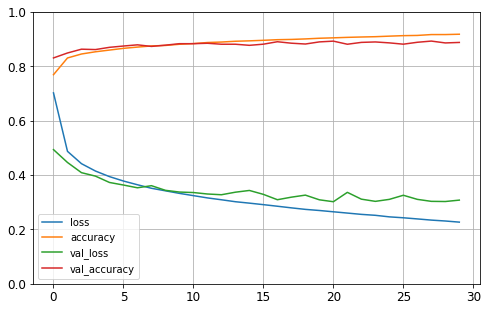

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The training accuracy and the validation accuracy increase during training, while the training loss and the validation loss decrease. The validation curves are close to the training curves, which means that there is not too much overfitting. The training set performance ends up beating the validation performance, as is generally the case when you train for long enough.

Evaluate the model:

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8726


[0.3474481999874115, 0.8726000189781189]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set.

Now we can make predictions on new instances, we will just use the first three instances of the test set:

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

We have obtained the probabilities of the new objects but if we want to actually obtain the class with higher probability we can use the following code:

In [23]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Check the prediction:

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)